In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
# data_dir="C:\\Users\\VK\\Documents\\Poojastuff\\dono\\Logistic Regression\\Logistic Regression"
# os.chdir(data_dir)

In [2]:
data=pd.read_csv("dm.csv",na_values=[""," ","NA","N/A"])

In [3]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [4]:
## Assume people who spend more than the average are good customers
data['target']=data['AmountSpent'].map(lambda x: 1 if x>data['AmountSpent'].mean() else 0)

In [5]:
data=data.drop("AmountSpent",axis=1)

In [6]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Cust_Id,target
0,Old,Female,Own,Single,Far,47500,0,High,6,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,127,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,479,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,475,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,151,1


In [7]:
data['History'].value_counts()

High      255
Low       230
Medium    212
Name: History, dtype: int64

In [8]:
data['History'].isnull().sum()

303

In [9]:
## Minimal Data Prep
data['History']=data['History'].fillna("NewCust")

In [10]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Cust_Id,target
0,Old,Female,Own,Single,Far,47500,0,High,6,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,127,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,479,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,475,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,151,1


In [11]:
data['History'].value_counts()

NewCust    303
High       255
Low        230
Medium     212
Name: History, dtype: int64

In [12]:
## One-hot encode categorical columns

AgeDummy = pd.get_dummies(data['Age'])
GenderDummy = pd.get_dummies(data['Gender'] , prefix = 'class')
OwnHomeDummy = pd.get_dummies(data['OwnHome'] , prefix = 'class')
MarriedDummy = pd.get_dummies(data['Married'] , prefix = 'class')
LocationDummy = pd.get_dummies(data['Location'] , prefix = 'class')
HistoryDummy = pd.get_dummies(data['History'] , prefix = 'class')

data = pd.concat([data,AgeDummy,GenderDummy,OwnHomeDummy,MarriedDummy,LocationDummy,HistoryDummy], axis=1)
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Cust_Id,...,class_Own,class_Rent,class_Married,class_Single,class_Close,class_Far,class_High,class_Low,class_Medium,class_NewCust
0,Old,Female,Own,Single,Far,47500,0,High,6,247,...,1,0,0,1,0,1,1,0,0,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,127,...,0,1,0,1,1,0,1,0,0,0
2,Young,Female,Rent,Single,Close,13500,0,Low,18,479,...,0,1,0,1,1,0,0,1,0,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,475,...,1,0,1,0,1,0,1,0,0,0
4,Middle,Female,Own,Single,Close,68400,0,High,12,151,...,1,0,0,1,1,0,1,0,0,0


In [13]:
## Drop redundant columns to prevent multicollinearity of dummy variables
data.drop(['Cust_Id','Age' , 'Gender' , 'OwnHome','Married' , 'Location', 'History'] , axis = 1 , inplace = True)

In [14]:
data.head()

,Salary,Children,Catalogs,target,Middle,Old,Young,class_Female,class_Male,class_Own,class_Rent,class_Married,class_Single,class_Close,class_Far,class_High,class_Low,class_Medium,class_NewCust
0,47500,0,6,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0
1,63600,0,6,1,1,0,0,0,1,0,1,0,1,1,0,1,0,0,0
2,13500,0,18,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0
3,85600,1,18,1,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0
4,68400,0,12,1,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0


In [15]:
## Split the data into test and train
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data.drop('target', axis=1), data['target'],\
                                                    test_size=0.2, random_state=156)

In [16]:
## Build Model
import statsmodels.api as sm

# Adding constant term as we are using statsmodel
xtrain = sm.add_constant(xtrain)
xtest = sm.add_constant(xtest)

In [17]:
model1=sm.GLM(ytrain,xtrain,family=sm.families.Binomial()).fit()

In [18]:
print(model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  800
Model:                            GLM   Df Residuals:                      787
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -192.40
Date:                Sun, 24 Oct 2021   Deviance:                       384.80
Time:                        19:04:35   Pearson chi2:                     478.
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.5487    905.298     -0.004

In [19]:
print(model1.summary2())

                  Results: Generalized linear model
Model:                 GLM                AIC:              410.8025  
Link Function:         logit              BIC:              -4875.9869
Dependent Variable:    target             Log-Likelihood:   -192.40   
Date:                  2021-10-24 19:04   LL-Null:          -537.59   
No. Observations:      800                Deviance:         384.80    
Df Model:              12                 Pearson chi2:     478.      
Df Residuals:          787                Scale:            1.0000    
Method:                IRLS                                           
----------------------------------------------------------------------
               Coef.    Std.Err.    z    P>|z|     [0.025     0.975]  
----------------------------------------------------------------------
const          -3.5487  905.2980 -0.0039 0.9969  -1777.9002  1770.8028
Salary          0.0001    0.0000  6.1991 0.0000      0.0000     0.0001
Children       -0.6459   

In [20]:
## Remove factors with high p-value
xtrain.drop(['class_Medium'] , axis = 1 , inplace = True)
xtest.drop(['class_Medium'] , axis = 1 , inplace = True)

In [21]:
model2=sm.GLM(ytrain, xtrain, family=sm.families.Binomial()).fit()

In [22]:
print(model2.summary2())

                   Results: Generalized linear model
Model:                 GLM                 AIC:               410.8025  
Link Function:         logit               BIC:               -4875.9869
Dependent Variable:    target              Log-Likelihood:    -192.40   
Date:                  2021-10-24 19:05    LL-Null:           -537.59   
No. Observations:      800                 Deviance:          384.80    
Df Model:              12                  Pearson chi2:      478.      
Df Residuals:          787                 Scale:             1.0000    
Method:                IRLS                                             
------------------------------------------------------------------------
               Coef.    Std.Err.     z     P>|z|     [0.025     0.975]  
------------------------------------------------------------------------
const          -2.4236     0.2419 -10.0192 0.0000     -2.8977    -1.9495
Salary          0.0001     0.0000   6.1991 0.0000      0.0000     0.000

In [23]:
## Remove factors with high p-value
xtrain.drop(['class_Low'] , axis = 1 , inplace = True)
xtest.drop(['class_Low'] , axis = 1 , inplace = True)

In [24]:
model3=sm.GLM(ytrain, xtrain, family=sm.families.Binomial()).fit()
print(model3.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            423.9361  
Link Function:      logit            BIC:            -4867.5379
Dependent Variable: target           Log-Likelihood: -199.97   
Date:               2021-10-24 19:05 LL-Null:        -537.59   
No. Observations:   800              Deviance:       399.94    
Df Model:           11               Pearson chi2:   559.      
Df Residuals:       788              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          -2.4776   0.2315 -10.7037 0.0000 -2.9313 -2.0239
Salary          0.0001   0.0000   6.5321 0.0000  0.0000  0.0001
Children       -0.8041   0.1734  -4.6379 0.0000 -1.1439 -0.4643
Catalogs        0.2228   0.0245   9.1063 0.0000  0.1748

In [25]:
## Remove factors with high p-value
xtrain.drop(['Middle'] , axis = 1 , inplace = True)
xtest.drop(['Middle'] , axis = 1 , inplace = True)

In [26]:
model4=sm.GLM(ytrain, xtrain, family=sm.families.Binomial()).fit()
print(model4.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            423.9361  
Link Function:      logit            BIC:            -4867.5379
Dependent Variable: target           Log-Likelihood: -199.97   
Date:               2021-10-24 19:05 LL-Null:        -537.59   
No. Observations:   800              Deviance:       399.94    
Df Model:           11               Pearson chi2:   559.      
Df Residuals:       788              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           -2.6021   0.2772 -9.3878 0.0000 -3.1454 -2.0589
Salary           0.0001   0.0000  6.5321 0.0000  0.0000  0.0001
Children        -0.8041   0.1734 -4.6379 0.0000 -1.1439 -0.4643
Catalogs         0.2228   0.0245  9.1063 0.0000  0.1748

In [27]:
## Remove factors with high p-value
xtrain.drop(['Old'] , axis = 1 , inplace = True)
xtest.drop(['Old'] , axis = 1 , inplace = True)

In [28]:
model5=sm.GLM(ytrain, xtrain, family=sm.families.Binomial()).fit()
print(model5.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            421.9834  
Link Function:      logit            BIC:            -4874.1753
Dependent Variable: target           Log-Likelihood: -199.99   
Date:               2021-10-24 19:05 LL-Null:        -537.59   
No. Observations:   800              Deviance:       399.98    
Df Model:           10               Pearson chi2:   556.      
Df Residuals:       789              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          -2.6250   0.2569 -10.2177 0.0000 -3.1285 -2.1215
Salary          0.0001   0.0000   6.7986 0.0000  0.0000  0.0001
Children       -0.7937   0.1664  -4.7704 0.0000 -1.1198 -0.4676
Catalogs        0.2231   0.0244   9.1270 0.0000  0.1752

In [29]:
## Let's check confusion matrix and AUC
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
predictions=model5.predict(xtest)

In [31]:
predictions.head()

978    0.553425
121    0.889847
455    0.052898
358    0.997564
531    0.000037
dtype: float64

In [32]:
threshold=0.5
predicted_classes = np.where(predictions>threshold, 1, 0)

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, predicted_classes)

0.895

In [34]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(ytest,predicted_classes)
conf = pd.DataFrame(confmat, index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])
conf

,Predicted 0,Predicted 1
Actual 0,108,11
Actual 1,10,71


In [35]:
print(classification_report(ytest,predicted_classes))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       119
           1       0.87      0.88      0.87        81

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.90      0.90      0.90       200



In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

#Get roc auc score
roc_score = roc_auc_score(ytest, predictions)
print('ROC Score is '+str(roc_score))
#Get false positive rate, true positive rate and threshold using roc curve
falsePositiveRate, truePositiverate, threshold = roc_curve(ytest, predictions)

ROC Score is 0.9624442369540409


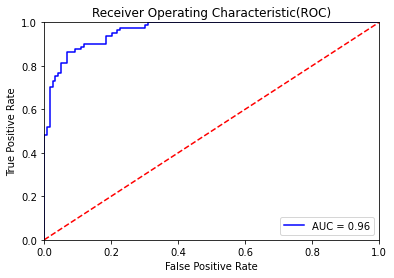

In [37]:
# Plotting ROC curve

plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(falsePositiveRate, truePositiverate, 'b', label = 'AUC = %0.2f' % roc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
optimal_idx = np.argmax(truePositiverate-falsePositiveRate)
optimal_threshold = threshold[optimal_idx]
print(optimal_threshold)

0.5938310439599231


In [39]:
predicted_classes = np.where(predictions>optimal_threshold, 1, 0)

In [40]:
accuracy_score(ytest, predicted_classes)

0.9

In [41]:
confusion_mat = confusion_matrix(ytest,predicted_classes)
confusion_df  = pd.DataFrame(confusion_mat,index=['Actual 0', 'Actual 1'],columns=['Predicted 0','Predicted 1'])
confusion_df

,Predicted 0,Predicted 1
Actual 0,111,8
Actual 1,12,69


In [42]:
print(classification_report(ytest,predicted_classes))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       119
           1       0.90      0.85      0.87        81

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.90       200
weighted avg       0.90      0.90      0.90       200



In [43]:
## Build model using sklearn
from sklearn.linear_model import LogisticRegression

In [44]:
xtrain, xtest, ytrain, ytest = train_test_split(data.drop('target', axis=1), data['target'],\
                                                    test_size=0.2, random_state=123)

In [45]:
xtrain.drop(['class_Medium','class_Low','Middle','Old'] , axis = 1 , inplace = True)
xtest.drop(['class_Medium','class_Low','Middle','Old'] , axis = 1 , inplace = True)

In [46]:
logreg_model = LogisticRegression().fit(xtrain, ytrain)

In [47]:
logreg_pred = logreg_model.predict(xtest)

In [48]:
logreg_pred[1:5]

array([1, 1, 1, 1], dtype=int64)

In [49]:
accuracy_score(ytest, logreg_pred)

0.82